In [1]:
import os

import os

print(os.getcwd())
os.chdir(os.path.abspath("../src"))  # 将执行路径改为src目录下
print(os.getcwd())
import pyproj
print(pyproj.__version__)

D:\Architecture\AAA-Master\24Fall\RoadNetOpt\RoadNetOpt\playground
D:\Architecture\AAA-Master\24Fall\RoadNetOpt\RoadNetOpt\src
3.4.1


In [2]:
import numpy as np
import osmnx as ox
from utils import RoadLevel, RoadState, RegionAccessibleType, RegionType, BuildingStyle, BuildingQuality, \
    BuildingMovableType

# 指定要提取的图层名称
road_layer_mapper = {
    '车行-主干道': RoadLevel.TRUNK,
    '车行-次干道': RoadLevel.PRIMARY,
    '车行-支路': RoadLevel.SECONDARY,
    '车行-街巷': RoadLevel.TERTIARY,
    '人行-街巷': RoadLevel.FOOTWAY
}

road_state_mapper = {
    '车行-主干道': RoadState.RAW,
    '车行-次干道': RoadState.RAW,
    '车行-支路': RoadState.RAW,
    '车行-街巷': RoadState.RAW,
    '人行-街巷': RoadState.RAW
}
height_layer = '高程点'

building_style_mapper = {
    'DX-地形': BuildingStyle.NORMAL,
    '000历史建筑': BuildingStyle.HISTORICAL,
    '000文保单位': BuildingStyle.HERITAGE,
}
building_movable_mapper = {
    'DX-地形': BuildingMovableType.UNDEFINED,
    '000历史建筑': BuildingMovableType.NONDEMOLISHABLE,
    '000文保单位': BuildingMovableType.NONDEMOLISHABLE,
}
building_quality_mapper = {
    'DX-地形': BuildingQuality.UNDEFINED,
    '000历史建筑': BuildingQuality.UNDEFINED,
    '000文保单位': BuildingQuality.UNDEFINED,
}

region_accessible_mapper = {
    '000-封闭小区边界线': RegionAccessibleType.INACCESSIBLE,
    'XZ-E1': RegionAccessibleType.INACCESSIBLE,
    '外水E1': RegionAccessibleType.INACCESSIBLE,
}
region_type_mapper = {
    '000-封闭小区边界线': RegionType.ARTIFICIAL,
    'XZ-E1': RegionType.WATER,
    '外水E1': RegionType.WATER
}
# 指定经纬度范围
mOSMNorth = 37.79
mOSMSouth = 37.78
mOSMEast = -122.41
mOSMWest = -122.43

# 获取地图数据
tags = {"building": True}
gdf = ox.features_from_bbox(bbox=(mOSMNorth, mOSMSouth, mOSMEast, mOSMWest), tags=tags)

buildings = gdf[gdf["building"].notnull()]

In [3]:
# 显示每行 5 列及其对应的两个值
columns = buildings.columns.tolist()  # 获取列名列表
rows_per_line = 5  # 每行显示的列数

for i in range(0, len(columns), rows_per_line):
    # 当前行的列名
    current_columns = columns[i:i + rows_per_line]

    # 构造每列的输出信息
    output = []
    for col in current_columns:
        output.append(f"{col}")

    # 打印当前行
    print(", ".join(output))

addr:state, building, ele, gnis:feature_id, name
source, geometry, amenity, wheelchair, fixme
addr:city, addr:country, addr:housenumber, addr:postcode, addr:street
brand, brand:wikidata, opening_hours, emergency, parking
contact:website, tourism, level, access, note
wikimedia_commons, highway, network, nodes, building:levels
fee, height, name:en, phone, wikidata
wikipedia, max_level, min_level, shop, toilets
alt_name, religion, short_name, website, description
start_date, old_name, capacity:disabled, lit, supervised
surface, fax, addr:housename, contact:facebook, contact:instagram
contact:twitter, email, internet_access, internet_access:fee, rooms
smoking, check_date, historic, landuse, roof:shape
was:amenity, designation, operator, layer, club
area, operator:wikidata, building:material, atm, cuisine
disused:amenity, building:flats, leisure, operator:short, operator:website
operator:wikipedia, power, substation, voltage, capacity
image, office, air_conditioning, payment:american_expres

In [4]:
building = buildings.iloc[1]
geometry = building['geometry']
print(type(geometry))
print(dir(geometry))

<class 'shapely.geometry.point.Point'>
['__and__', '__bool__', '__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__geo_interface__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__nonzero__', '__or__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__slots__', '__str__', '__sub__', '__subclasshook__', '__xor__', '_geom', '_geom_prepared', '_ndim', '_repr_svg_', 'almost_equals', 'area', 'boundary', 'bounds', 'buffer', 'centroid', 'contains', 'contains_properly', 'convex_hull', 'coords', 'covered_by', 'covers', 'crosses', 'difference', 'disjoint', 'distance', 'dwithin', 'envelope', 'equals', 'equals_exact', 'geom_type', 'geometryType', 'has_z', 'hausdorff_distance', 'interpolate', 'intersection', 'intersects', 'is_closed', 'is_empty', 'is_ring', 'is_simple', 'is_valid', 'length', 'line_interpolate_point', 'line_locate_point', '

In [5]:
import shapely
polygons = []
for i, building in buildings.iterrows():
    geometry = building['geometry']
    if not isinstance(geometry, shapely.geometry.Point):
        polygons.append(geometry)
print(len(polygons))

1785


In [6]:
import numpy as np
polygon = polygons[0]
print(list(polygon.exterior.coords))
points  = np.array(list(polygon.exterior.coords))
print(points.shape)


[(-122.4166302, 37.7804564), (-122.4165794, 37.7801888), (-122.4165272, 37.7799139), (-122.4154353, 37.7800434), (-122.4154565, 37.780155), (-122.4153247, 37.7801706), (-122.4153796, 37.7804596), (-122.4158179, 37.7804076), (-122.4158251, 37.7804451), (-122.4159074, 37.7804353), (-122.415924, 37.7805223), (-122.4164421, 37.7804608), (-122.4164454, 37.7804783), (-122.4166302, 37.7804564)]
(14, 2)


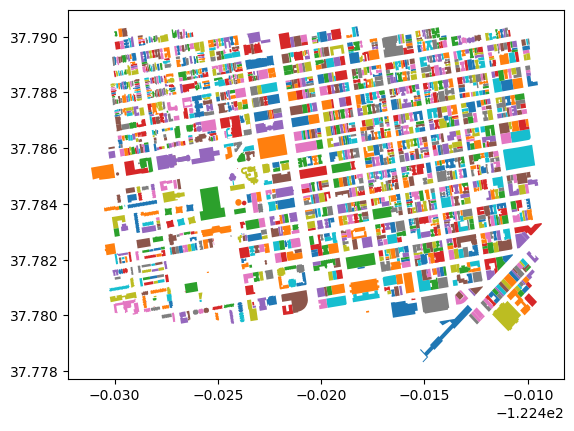

In [7]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
for polygon in polygons:
    x, y = polygon.exterior.xy
    ax.fill(x, y, alpha=1)  # 使用 fill 方法填充多边形
plt.show()

In [8]:
def osm_buildings_to_data(osm_building_gdf, out_data):
    if 'buildings' not in out_data:
        out_data['buildings'] = []

    for index, row in osm_building_gdf.iterrows():
        geometry = row['geometry']
        if not isinstance(geometry, shapely.geometry.Polygon):
            continue
        _points = np.array(list(geometry.exterior.coords)).tolist()
        _building_data = {
            'points': _points,
            'style': BuildingMovableType.UNDEFINED,
            'movable': BuildingStyle.UNDEFINED,
            'quality': BuildingQuality.UNDEFINED
        }

        out_data['buildings'].append(_building_data)

buildings_data = {}
osm_buildings_to_data(buildings,buildings_data)
print(buildings_data)

{'buildings': [{'points': [[-122.4166302, 37.7804564], [-122.4165794, 37.7801888], [-122.4165272, 37.7799139], [-122.4154353, 37.7800434], [-122.4154565, 37.780155], [-122.4153247, 37.7801706], [-122.4153796, 37.7804596], [-122.4158179, 37.7804076], [-122.4158251, 37.7804451], [-122.4159074, 37.7804353], [-122.415924, 37.7805223], [-122.4164421, 37.7804608], [-122.4164454, 37.7804783], [-122.4166302, 37.7804564]], 'style': <BuildingMovableType.UNDEFINED: -1>, 'movable': <BuildingStyle.UNDEFINED: -1>, 'quality': <BuildingQuality.UNDEFINED: -1>}, {'points': [[-122.4310973, 37.7850477], [-122.4310935, 37.7850271], [-122.431083, 37.7849732], [-122.4310626, 37.7848685], [-122.4307571, 37.7849274], [-122.430745, 37.7848596], [-122.4302702, 37.7848998], [-122.4301635, 37.7849153], [-122.4299798, 37.7849292], [-122.4299836, 37.7849436], [-122.4299824, 37.7849373], [-122.430014, 37.7850959], [-122.4300298, 37.7851752], [-122.4300377, 37.7852144], [-122.4300455, 37.7852538], [-122.4300543, 37.78

In [9]:

#
# 处理建筑物数据
building_data_dict = {}

for index, row in buildings.iterrows():
    geometry = row['geometry']  # 假设建筑物的几何形状存储在 'geometry' 列中
    if not isinstance(geometry, shapely.geometry.Polygon):
        continue
    _points_tuple = list(geometry.exterior.coords)
    _points = [[point[0], point[1]] for point in _points_tuple]
    _building_data = {
        'points': _points,
        'style': BuildingMovableType.UNDEFINED,
        'movable': BuildingStyle.UNDEFINED,
        'quality': BuildingQuality.UNDEFINED
    }

    building_data_dict[index] = _building_data

data_to_input = {'buildings': list(building_data_dict.values())}

In [10]:
from pyproj import Transformer

# 定义转换器，从经纬度坐标系（EPSG 4326）到墨卡托投影坐标系（EPSG 3857）
transformer = Transformer.from_crs("epsg:4326", "epsg:3857")

# 经纬度坐标
lon = -122.4172732
lat = 37.782618

# 转换经纬度坐标为墨卡托投影坐标
x, y = transformer.transform(lon, lat)

print("经度：", x, " 米")
print("纬度：", y, " 米")

经度： inf  米
纬度： inf  米


In [11]:
import os
print(os.getcwd())

if 'playground' in os.getcwd():
    os.chdir('../src')
print(os.getcwd())

D:\Architecture\AAA-Master\24Fall\RoadNetOpt\RoadNetOpt\src
D:\Architecture\AAA-Master\24Fall\RoadNetOpt\RoadNetOpt\src


In [12]:
from geo import Road
from utils import io_utils
data:dict = io_utils.load_data('../data/VirtualEnv/simple_road_building.bin')

D:\STUDY\anaconda3\envs\RoadNetOpt\lib\site-packages\fontTools\misc\py23.py:11: DeprecationWarning: The py23 module has been deprecated and will be removed in a future release. Please update your code.
  warnings.warn(


In [13]:
print(data.keys())

dict_keys(['version', 'roads', 'buildings', 'regions', 'height'])


In [14]:
print(type(data['buildings']))

<class 'list'>


In [15]:
first_data_building = data['buildings'][0]

In [16]:
print(first_data_building.keys())

dict_keys(['points', 'style', 'movable', 'quality'])


In [17]:
print(first_data_building['style'])
print(type(first_data_building['style']))

BuildingStyle.NORMAL
<enum 'BuildingStyle'>


In [18]:
print(first_data_building['points'])
print(type(first_data_building['points']))
print(first_data_building['points'][0])

[[493991.9729736399, 3528794.130290153], [494071.9729736398, 3528794.130290153], [494071.9729736398, 3528769.130290153], [493991.9729736399, 3528769.130290153]]
<class 'list'>
[493991.9729736399, 3528794.130290153]


In [19]:
from utils.building_utils import BuildingStyle, BuildingQuality, BuildingMovableType
undefined = BuildingStyle.UNDEFINED
a = BuildingQuality.UNDEFINED
b = BuildingMovableType.UNDEFINED
print(undefined == 'UNDEFINED')

False


In [20]:
from utils.region_utils import RegionType, RegionAccessibleType


In [23]:
import osmnx as ox

# 指定城市的地名
cities = ["London, UK"]

# 获取城市的地理信息数据
for city in cities:
    try:
        location = ox.geocode_to_gdf(city)
        print(f"{city} 被成功解析！\n", location)
    except Exception as e:
        print(f"{city} 无法被解析: {e}")
    G = ox.graph_from_place(city, network_type='all')
    print("获取了{}的地理信息数据".format(city))
    ox.plot_graph(G)

London, UK 被成功解析！
                                             geometry  bbox_north  bbox_south  \
0  POLYGON ((-0.51038 51.468, -0.51036 51.468, -0...   51.691874    51.28676   

   bbox_east  bbox_west   place_id  osm_type  osm_id        lat       lon  \
0   0.334016  -0.510375  258689701  relation   65606  51.489334 -0.144055   

      class        type  place_rank  importance addresstype    name  \
0  boundary  ceremonial          25    0.882089        city  London   

                                      display_name  
0  London, Greater London, England, United Kingdom  


D:\STUDY\anaconda3\envs\RoadNetOpt\lib\site-packages\osmnx\graph.py:390: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  polygon = gdf_place["geometry"].unary_union


MemoryError: 

In [ ]:
import os.path
import random

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from geo import Road, Building, Region
from utils import point_utils, image_utils, road_utils, io_utils
from utils import RoadState, RoadLevel

from optimize_module import RoadOptimizer
from fields import BuildingField, AttractionField, DirectionField, MomentumField, RandomField

In [ ]:

data = io_utils.load_data("../data/和县/data.bin")
Road.data_to_roads(data)

print('Creating my road')
# output: Creating my road
my_road_start_point = np.array([[2, 3]])
print(f'My road start point is {my_road_start_point}')
# output: My road start point is [[2 3]]
my_road_uid = Road.add_road_by_coords(coords=my_road_start_point, level=RoadLevel.TERTIARY,
                                      state=RoadState.OPTIMIZING)

my_road = Road.get_road_by_uid(my_road_uid)
print(f'My road created (uid: {my_road_uid}, type: {type(my_road)})')
# output: My road created (uid: fc3234e5-3b5a-4e1c-93de-5f590415e511, type: <class 'pandas.core.series.Series'>)
print('My road geo: ', my_road['geometry'])
# output: My road geo:  POINT (2 3)
for i in range(5):
    new_point = np.random.rand(1, 2) * 10
    print(f'[{i}] new point = {new_point}')
    #  output: [0] new point = [[2.65889853 7.19537759]]
    #  output: [1] new point = [[0.20383911 1.77654136]]
    #  output: [2] new point = [[9.74504769 7.18593455]]
    #  output: [3] new point = [[5.7888099  2.07847427]]
    #  output: [4] new point = [[0.51628918 1.22321586]]
    my_road = Road.add_point_to_road(my_road, point=new_point)
    # 由于pd.Serial与元组的性质类似，对其任何的修改都会创建一个新的对象，
    # 因此这里add point的地方需要写my_road = Road.add_point_to_road(my_road, point=new_point)

print('\nMy road geo: ', my_road['geometry'])
# output: My road geo:  LINESTRING (2 3, 2.658898529150666 7.195377590750704, 0.2038391080744739 1.7765413565553279, 9.745047694992158 7.185934551413156, 5.788809902421127 2.0784742740679296, 0.5162891813906301 1.2232158625001954)
print(np.array(list(my_road['geometry'].coords)))
# output:
# [[2.         3.        ]
#  [2.65889853 7.19537759]
#  [0.20383911 1.77654136]
#  [9.74504769 7.18593455]
#  [5.7888099  2.07847427]
#  [0.51628918 1.22321586]]

In [ ]:
a = my_road['coords'][0]
print(a)

In [ ]:
a.reshape(-1, 2)